<a href="https://colab.research.google.com/github/ragingsilverback/Data-Science-and-AI-with-Python/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering

In [0]:
# lets create some fake clustered data
import numpy as np

def createClusteredData(N,k):
  np.random.seed(10)
  pointsPerCluster = float(N)/k
  X = []
  for i in range (k):
    incomeCentroid = np.random.uniform(20000.0,200000.0)
    ageCentroid = np.random.uniform(20.0,70.0)
    for j in range(int(pointsPerCluster)):
      X.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid,2.0)])
  X = np.array(X)
  return X

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


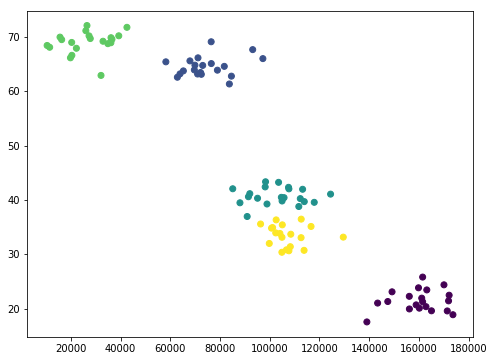

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np

data = createClusteredData(100,5)

model = KMeans(n_clusters=5)
model = model.fit(scale(data))

# print(scale(data))

print(model.labels_)

# print(data[:,0])

plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],c = model.labels_.astype(np.float))
plt.show()

Really Getting the feel of K-Means Clustering on images using OpenCV

In [31]:
import os
from google.colab import files
uploaded = files.upload()

Saving home.jpg to home.jpg


In [38]:
!ls
os.getcwd()

home.jpg  sample_data


'/content'

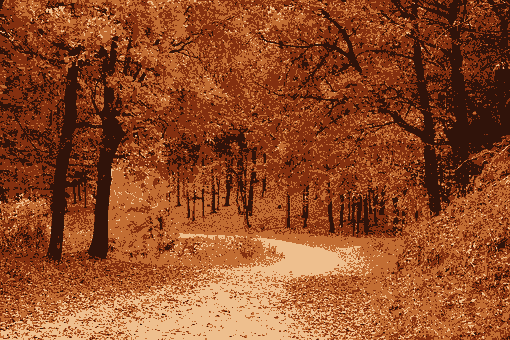

In [44]:


import numpy as np
import cv2
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/home.jpg')
# img = cv2.imread(BytesIO(uploaded['/content/home.jpg']))
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2_imshow(res2)
# cv2_imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()